In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice
%matplotlib inline

from thesis_v2 import dir_dict

from thesis_v2.plots.hal_tuning_analysis import show_scatter_plots

In [2]:
import pandas as pd

In [3]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'hal_tuning_complete.pkl')
df_main_result = pd.read_pickle(f_main_result)
# remove cls>7 results
df_main_result = df_main_result[df_main_result.index.get_level_values('rcnn_bl_cls')<=7].sort_index()

In [4]:
df_main_result

hal_tuning_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           1           cm-avg       1280                      None   
                                                                                                  2560                      None   
                                                                                                  5120                      None   
                                                                                     cm-last      1280                      None   
                                                                                                  2560                      None   
...                                                                                                                          ...   
softplus True                 poisson   1          6         16          1           legacy       2560                      None   
                                                                                                  5120                      None   
                                                             32          1           legacy       1280                      None   
                                                                                                  2560                      None   
                                                                                                  5120                      None   

                                                                                                             hal_tuning_analysis_half_improved  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                     
relu     False                mse       0          2         8           1           cm-avg       1280                                    None   
                                                                                                  2560                                    None   
                                                                                                  5120                                    None   
                                                                                     cm-last      1280                                    None   
                                                                                                  2560                                    None   
...                                                                                                                                        ...   
softplus True                 poisson   1          6         16          1           legacy       2560                                    None   
                                                                                                  5120                                    None   
                                                             32          1           legacy       1280                                    None   
                                                                                                  2560                                    None   
                                                                                                  5120                                    None   

                                                                                                             hal_tuning_analysis_half_improved_baseline  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                              
relu     False                mse       0          2         8           1           cm-avg       1280                                             None   
                            

(6912, 2)
overall
baseline mean -0.0299, sem 0.0009
learned mean 0.0419, sem 0.0009
% of pairs, learned > mean 77.89%
cm-avg
baseline mean -0.0291, sem 0.0019
learned mean 0.0313, sem 0.0020
% of pairs, learned > mean 74.65%
cm-last
baseline mean -0.0291, sem 0.0019
learned mean 0.0565, sem 0.0017
% of pairs, learned > mean 81.89%
inst-avg
baseline mean -0.0306, sem 0.0018
learned mean 0.0497, sem 0.0018
% of pairs, learned > mean 82.70%
inst-last
baseline mean -0.0306, sem 0.0018
learned mean 0.0302, sem 0.0018
% of pairs, learned > mean 72.34%


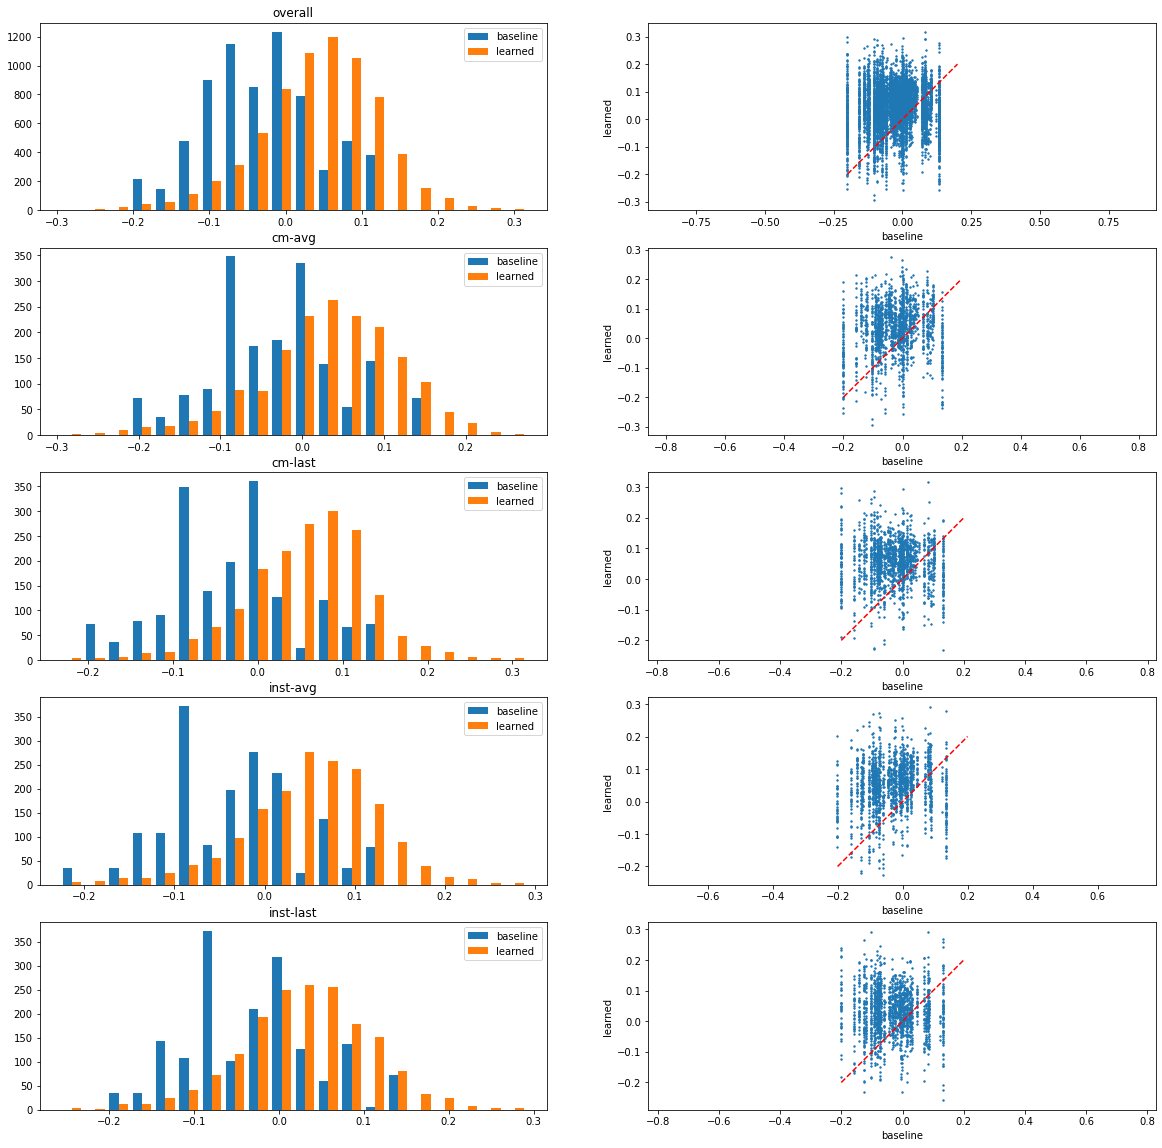

(6912, 2)
overall
baseline mean 0.0009, sem 0.0009
learned mean 0.0400, sem 0.0009
% of pairs, learned > mean 63.54%
cm-avg
baseline mean 0.0009, sem 0.0018
learned mean 0.0305, sem 0.0019
% of pairs, learned > mean 58.85%
cm-last
baseline mean 0.0009, sem 0.0018
learned mean 0.0536, sem 0.0017
% of pairs, learned > mean 69.91%
inst-avg
baseline mean 0.0009, sem 0.0019
learned mean 0.0476, sem 0.0018
% of pairs, learned > mean 68.29%
inst-last
baseline mean 0.0009, sem 0.0019
learned mean 0.0282, sem 0.0018
% of pairs, learned > mean 57.12%


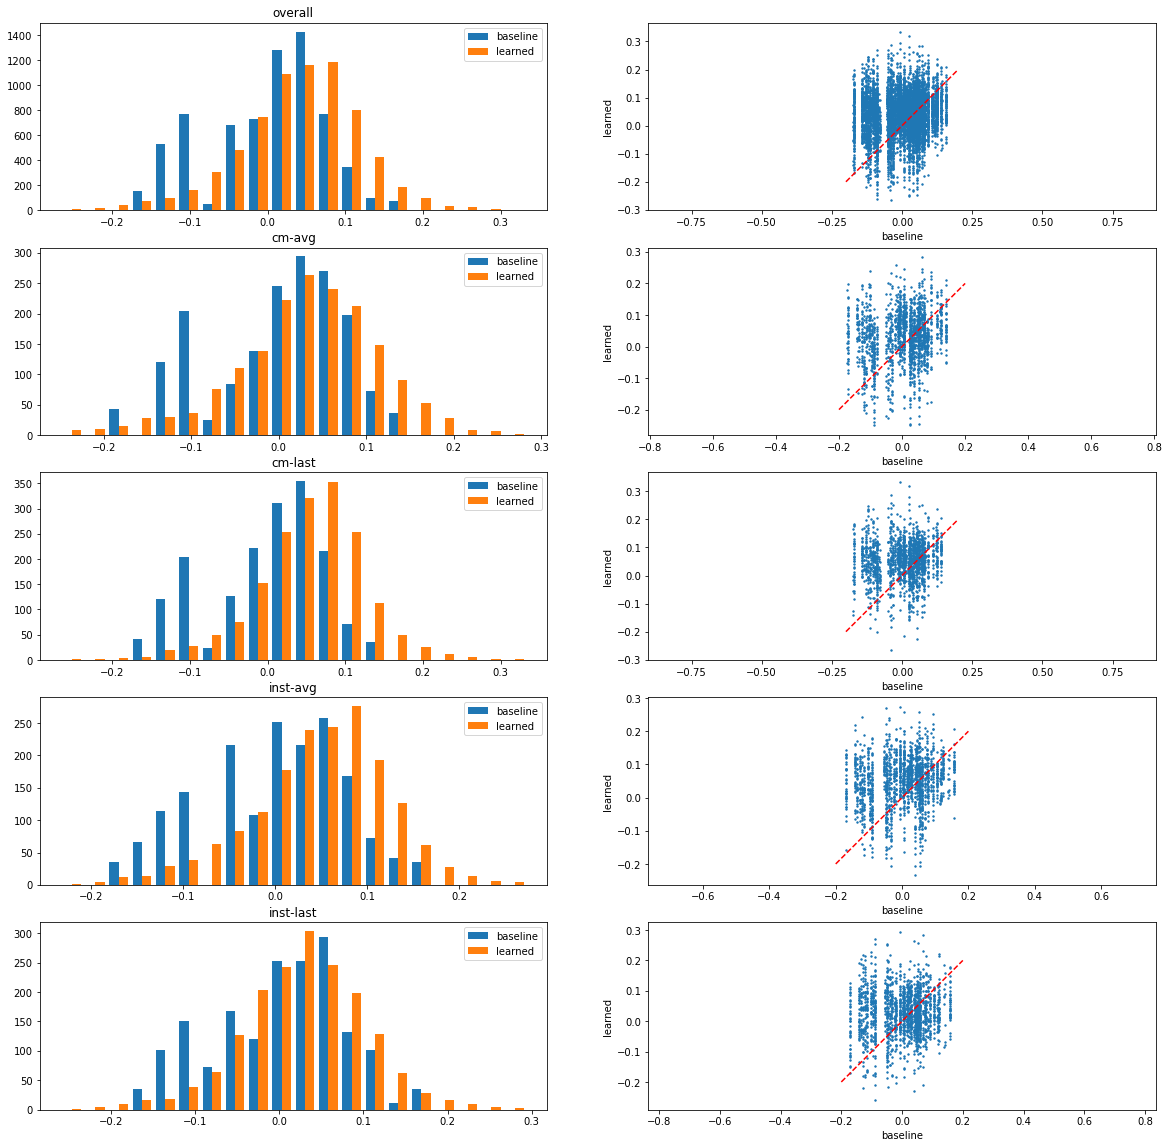

In [5]:
show_scatter_plots(df_main_result)